<a href="https://colab.research.google.com/github/klopetx/PHM_tutorial/blob/main/src/02.C_Feature_Extraction_III_time-frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

project_path = 'PHM_tutorial'

if not os.path.isdir(project_path):

  username = 'klopetx'
  repo = project_path

  !git clone https://@github.com/{username}/{repo}

os.chdir(project_path)

!python src/00_Environment_Checks.py

Cloning into 'PHM_tutorial'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 115 (delta 61), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (115/115), 3.39 MiB | 8.90 MiB/s, done.
Resolving deltas: 100% (61/61), done.
The '10. FEMTO Bearing' directory does not exist inside 'data'
Runnning data download...
FEMTO downloaded


# Feature extraction

We just so how ward it is to obtain meaningfull informaton from raw signals.
That is why we try to characterize them in indicators/features/kpis so that we can summarise the content of the signal into meaningful data that represent how the signals has behaved.

In addition, we have seen how the frequency domain can be more specific to detect certain phenomenoms, mostly on rotating machinery.

## Time-Frequency domain features

As we know, rotating machines tend to have a rotating part or parts which creates a reccurring oscillation. For that reason, using frequency domain features is of great interest, as they remove the noise and obtain the information related to specific rotating parts.

However, the oscillations are not always constant, that is, sometimes, the machines can vary their rotating speed, which causes some difficulties when treating those data records with traditional fourier transforms.

We will use ShorTimeFourierTransform to see if we can see any variation on the frequencies during the recording of the tests.

## Raw signal

In [2]:
import pandas as pd
import numpy as np
from scipy.signal import stft
import matplotlib.pyplot as plt

target_file = 'data/10. FEMTO Bearing/Learning_set/Bearing1_1/acc_00025.csv'

df = pd.read_csv(target_file, header=None)

signal_series = df.iloc[:, 4]



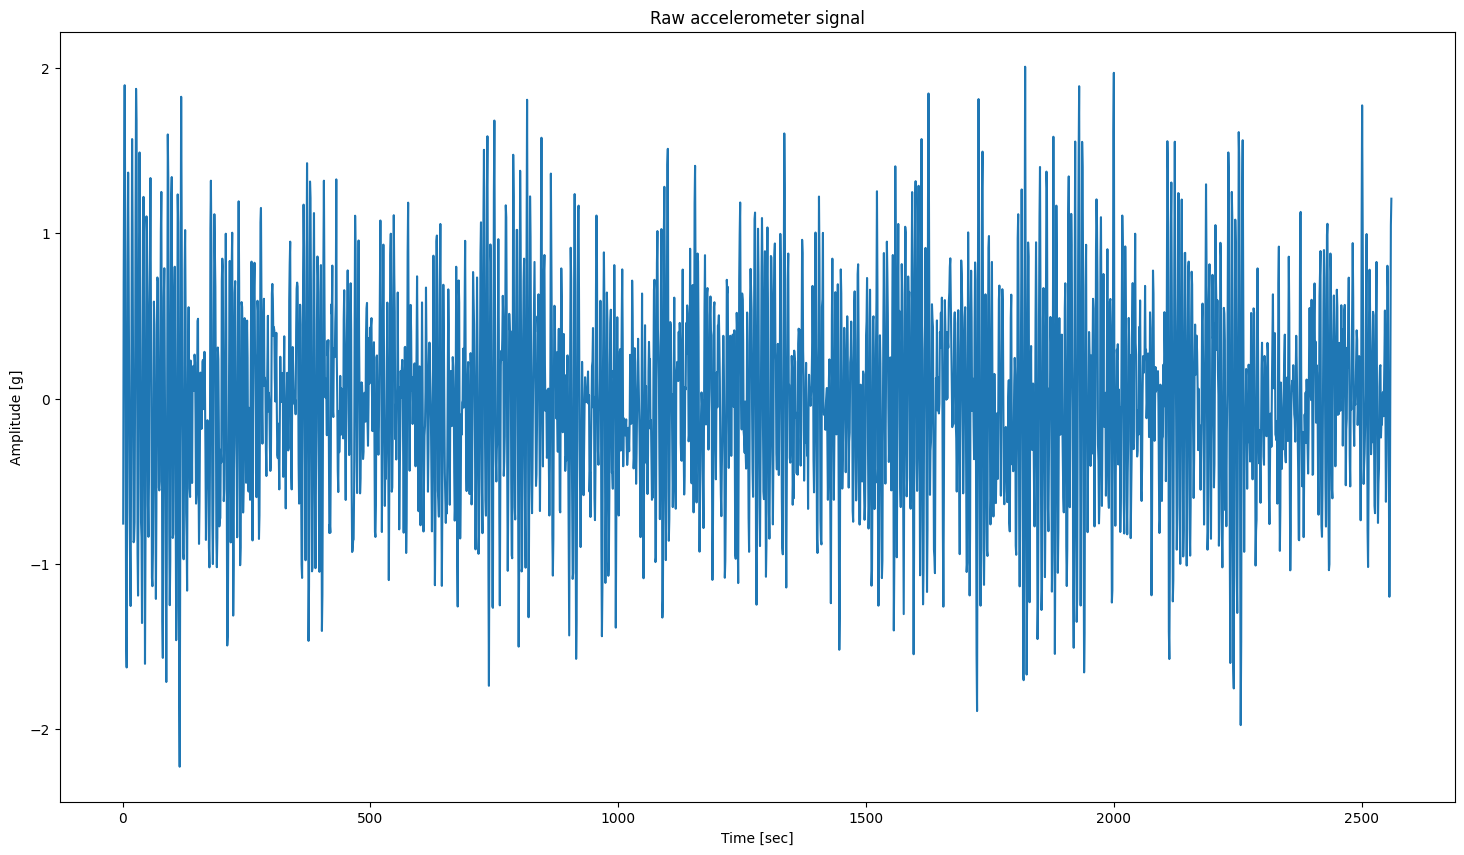

In [3]:
plt.figure(figsize=(18, 10))
plt.plot( np.linspace(1, signal_series.shape[0], signal_series.shape[0]), signal_series)
plt.title('Raw accelerometer signal')
plt.ylabel('Amplitude [g]')
plt.xlabel('Time [sec]')
plt.show()

## STFT


In [4]:

def plot_stft(signal_series, fs = 25600, samplesbysecond = 256,  max_freq = 6000):
  # Define the sampling frequency
  fs = 25600  # You provided this as the sampling frequency

  overlap = samplesbysecond // 2  # 50% overlap

  # Compute the STFT
  frequencies, times, Zxx = stft(signal_series, fs=fs, window='hann', nperseg=samplesbysecond, noverlap = overlap)

  # Plot the magnitude of the STFT

  plt.figure(figsize=(18, 10))
  plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
  plt.ylim(0, max_freq)
  plt.colorbar(label='Magnitude')
  plt.title('STFT Magnitude of Acceleration_1')
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.tight_layout()
  plt.show()



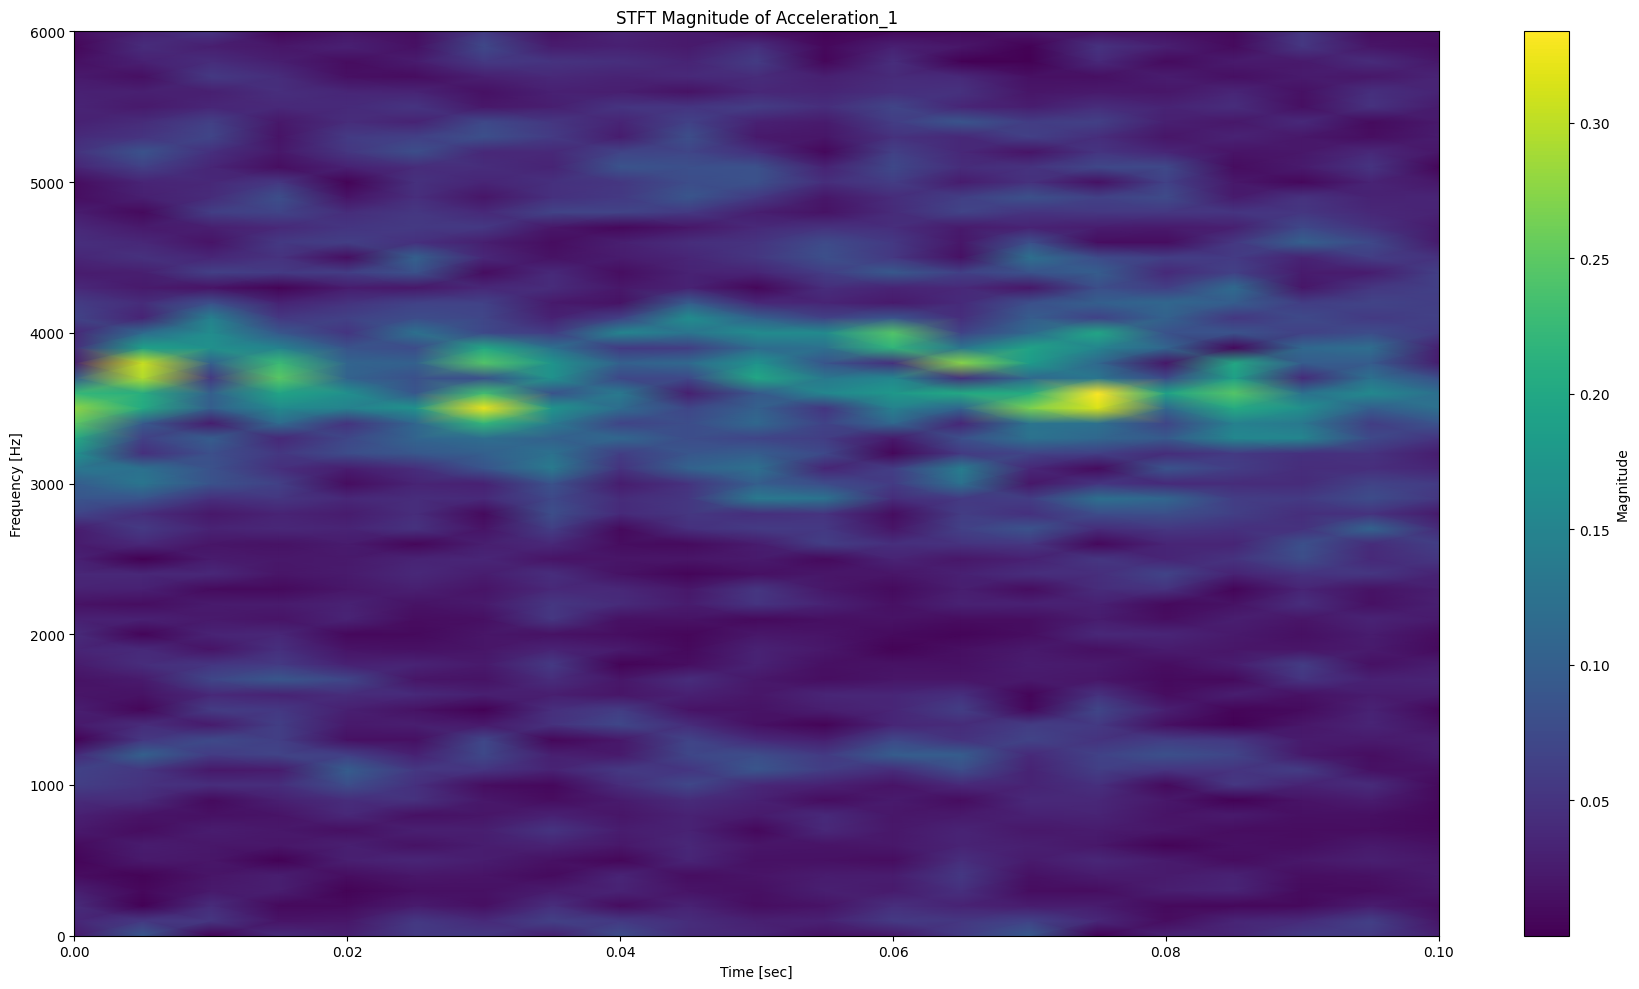

In [5]:
plot_stft(signal_series, fs = 25600, samplesbysecond = 256,  max_freq = 6000)



## Exercise

1) How does STFT answer to changes to the samplesbysecond parameter?

- What happens when samples per second takes a big value?
- How about when samples per seconds takes a small value?

Create additional plots using the plot_stft function to better understand the time/frequency resolution compromise.

